# Proyecto del Sprint 10

# Librerias

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go

# Paso 1. Descarga los datos y prepáralos para el análisis

## Lectura de los datos

In [104]:
rest_data = pd.read_csv('./datasets/rest_data_us_upd.csv')

## Información general de los datos

In [105]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


## Datos NaN

In [106]:
rest_data.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [107]:
rest_data[rest_data['chain'] == False]

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9644,21430,LA BUFADORA BAR,3470 E 1ST ST,False,Bar,24
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD 1025,False,Restaurant,225
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93


In [108]:
#Existe 3 filas con valores NaN en la columna chain
rest_data[rest_data['chain'].isna()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [109]:
#Verificamos si existen más datos con los nombres de los restaurantes con datos NaN
print(rest_data[rest_data['object_name'] == 'TAQUERIA LOS 3 CARNALES'])
print(rest_data[rest_data['object_name'] == "JAMMIN JIMMY'S PIZZA"])
print(rest_data[rest_data['object_name'] == 'THE LEXINGTON THEATER'])

         id              object_name               address chain object_type  \
7408  19194  TAQUERIA LOS 3 CARNALES  5000 E WHITTIER BLVD   NaN  Restaurant   

      number  
7408      14  
         id           object_name              address chain object_type  \
7523  19309  JAMMIN JIMMY'S PIZZA  1641 FIRESTONE BLVD   NaN       Pizza   

      number  
7523       1  
         id            object_name       address chain object_type  number
8648  20434  THE LEXINGTON THEATER  129 E 3RD ST   NaN  Restaurant      35


In [110]:
rest_data['chain'] = rest_data['chain'].fillna(False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7336\3671991705.py:1: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



## Tipo de datos

In [111]:
rest_data['chain'] = rest_data['chain'].astype(bool)
rest_data['address'] = rest_data['address'].astype('string')
rest_data['object_name'] = rest_data['object_name'].astype('string')

In [112]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   string
 2   address      9651 non-null   string
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), object(1), string(2)
memory usage: 386.5+ KB


## Valores duplicados

In [113]:
rest_data.duplicated().sum()

0

# Paso 2. Análisis de datos

### Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.

In [114]:
proporciones_tipos_establecimientos = ((rest_data.groupby('object_type').size() / rest_data['object_type'].count())*100).reset_index(name = 'Porcentaje %').sort_values(by = 'Porcentaje %')
proporciones_tipos_establecimientos

,object_type,Porcentaje %
0,Bakery,2.932339
1,Bar,3.025593
4,Pizza,3.315719
2,Cafe,4.507305
3,Fast Food,11.045488
5,Restaurant,75.173557


In [115]:
fig = go.Figure(data=[go.Pie(labels = proporciones_tipos_establecimientos['object_type'], values = proporciones_tipos_establecimientos['Porcentaje %'])])
fig.show()

### Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico.

In [116]:
rest_data.groupby('chain')['object_name'].count()

chain
False    5975
True     3676
Name: object_name, dtype: int64

In [117]:
proporciones_cadenas_establecimientos = ((rest_data.groupby('chain').size() / rest_data['chain'].count())*100).reset_index(name = 'Porcentaje %').sort_values(by = 'Porcentaje %')
proporciones_cadenas_establecimientos

,chain,Porcentaje %
1,True,38.089317
0,False,61.910683


In [118]:
fig = go.Figure(data=[go.Pie(labels = proporciones_cadenas_establecimientos['chain'], values = proporciones_cadenas_establecimientos['Porcentaje %'])])
fig.show()

### ¿Qué tipo de establecimiento es habitualmente una cadena?

In [119]:
proporciones_tipos_cadenas_establecimientos = rest_data.groupby(['chain','object_type'])['object_type'].count().reset_index(name = 'n_establecimientos')
proporciones_tipos_cadenas_establecimientos['Porcentaje %'] = (proporciones_tipos_cadenas_establecimientos['n_establecimientos'] / proporciones_tipos_cadenas_establecimientos['n_establecimientos'].sum())*100

proporciones_tipos_cadenas_establecimientos.sort_values(by = ['chain','Porcentaje %'])

,chain,object_type,n_establecimientos,Porcentaje %
3,False,Pizza,167,1.730391
1,False,Cafe,169,1.751114
0,False,Bar,215,2.227748
2,False,Fast Food,461,4.776707
4,False,Restaurant,4963,51.424723
6,True,Bar,77,0.797845
9,True,Pizza,153,1.585328
7,True,Cafe,266,2.756191
5,True,Bakery,283,2.932339
8,True,Fast Food,605,6.268780


In [120]:
fig = go.Figure(data=[go.Pie(labels = proporciones_tipos_cadenas_establecimientos[['object_type','chain']], values = proporciones_tipos_cadenas_establecimientos['Porcentaje %'])])
fig.show()

Los restaurantes son habitualmente cadenas con 23.75% y le siguen los Fast Food con un 6.27%.

### ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

In [121]:
rest_data.groupby('chain')['number'].count()

chain
False    5975
True     3676
Name: number, dtype: int64

In [122]:
rest_data_chains = rest_data[rest_data['chain'] == True]
seats_chains_count_object_name = rest_data_chains.groupby('object_name')['number'].count().sort_values(ascending=False).reset_index(name = "n_asientos")

seats_chains_count_number = seats_chains_count_object_name.groupby('n_asientos')['object_name'].count().reset_index(name = 'n_locales')

In [123]:
seats_chains_count_number

,n_asientos,n_locales
0,1,2240
1,2,353
2,3,73
3,4,20
4,5,15
5,6,9
6,7,2
7,8,3
8,9,2
9,10,4


<Axes: xlabel='n_asientos', ylabel='n_locales'>

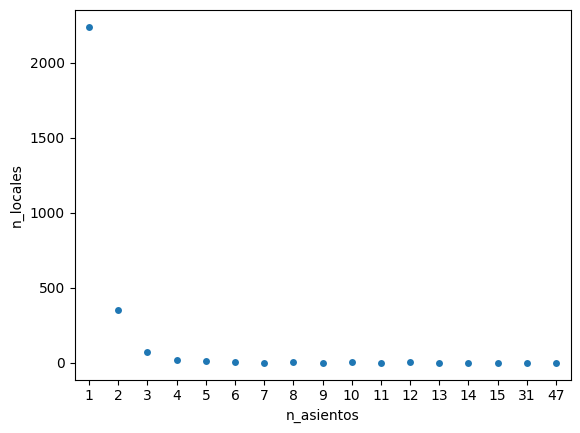

In [124]:
sns.stripplot(x = 'n_asientos',y = 'n_locales', data = seats_chains_count_number)

Se puede observar que existen muchos locales con pocos asientos.

### Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.

In [125]:
mean_object_type_number = rest_data.groupby('object_type')['number'].mean().reset_index(name = 'promedio_asientos').sort_values(by = 'promedio_asientos')

<Axes: xlabel='object_type', ylabel='promedio_asientos'>

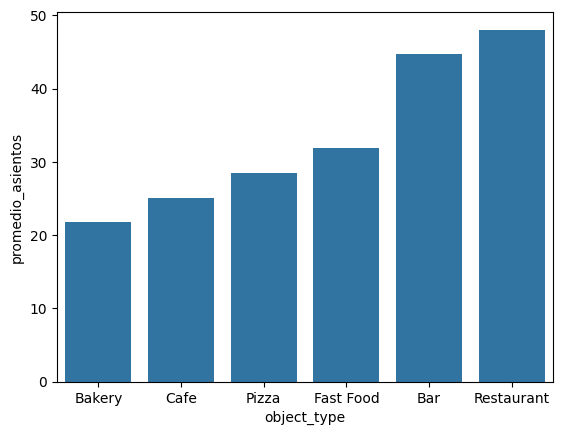

In [126]:
sns.barplot(x = 'object_type',y = 'promedio_asientos', data = mean_object_type_number)

Restaurantes son el tipo de local que tiene mayor promedio de asientos.

### Coloca los datos de los nombres de las calles de la columna address en una columna separada.

In [127]:
calles = rest_data['address']

### Traza un gráfico de las diez mejores calles por número de restaurantes.

In [128]:
address_top_10 = rest_data.groupby('address')['object_name'].count().reset_index(name = 'n_restaurantes').sort_values(by = 'n_restaurantes', ascending = False).head(10)

address_top_10

,address,n_restaurantes
4416,3607 TROUSDALE PKWY,11
1485,135 N GRAND AVE,10
6436,600 WORLD WAY,9
5799,5151 STATE UNIVERSITY DR,9
4802,400 WORLD WAY,9
6050,545 S FIGUEROA ST,8
2515,2025 AVENUE OF THE STARS,8
3424,300 WORLD WAY,8
7198,700 WORLD WAY,8
5285,450 S WESTERN AVE,6


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '3607 TROUSDALE PKWY'),
  Text(1, 0, '135 N GRAND AVE'),
  Text(2, 0, '600 WORLD WAY'),
  Text(3, 0, '5151 STATE UNIVERSITY DR'),
  Text(4, 0, '400 WORLD WAY'),
  Text(5, 0, '545 S FIGUEROA ST'),
  Text(6, 0, '2025 AVENUE OF THE STARS'),
  Text(7, 0, '300 WORLD WAY'),
  Text(8, 0, '700 WORLD WAY'),
  Text(9, 0, '450 S WESTERN AVE')])

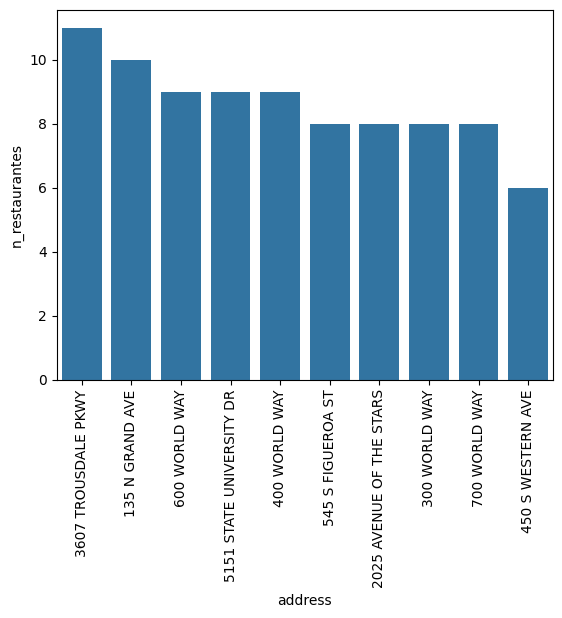

In [129]:
sns.barplot(x = 'address', y = 'n_restaurantes', data = address_top_10)
plt.xticks(rotation = 90)

### Encuentra el número de calles que solo tienen un restaurante.

In [130]:
address_restaurantes = rest_data.groupby('address')[['object_name','number']].count().reset_index().sort_values(by = 'object_name', ascending = False)

address_1_restaurantes = address_restaurantes[address_restaurantes['object_name'] == 1]

address_1_restaurantes

,address,object_name,number
5665,5040 WHITTIER BLVD,1,1
6176,5620 S MAIN ST,1,1
5954,532 S WESTERN AVE,1,1
6201,5648 HOLLYWOOD BLVD,1,1
5664,5040 W PICO BLVD,1,1
...,...,...,...
2994,2501 WILSHIRE BLVD,1,1
2993,2501 W SUNSET BLVD #E,1,1
2992,2501 W SUNSET BLVD #A,1,1
2991,2501 S SAN PEDRO ST,1,1


### Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

In [131]:
group_address = rest_data.groupby('address').agg({'object_name':'count','number':'sum'}).reset_index()
group_address

,address,object_name,number
0,00936 S MAPLE AVE 17,1,21
1,01253 N VINE ST #7A,1,29
2,03742 S FLOWER ST,1,39
3,05358 WILSHIRE BLVD,1,113
4,0800 W 6TH ST,1,195
...,...,...,...
8507,OLVERA ST 26,1,38
8508,OLVERA ST 5,1,4
8509,OLVERA ST E17,1,15
8510,OLVERA ST E8,1,1


In [140]:
address_more_1_restaurantes = group_address[group_address['object_name'] > 1]
address_more_1_restaurantes.sort_values(by = 'object_name', ascending = False)

,address,object_name,number
4416,3607 TROUSDALE PKWY,11,1020
1485,135 N GRAND AVE,10,765
6436,600 WORLD WAY,9,385
5799,5151 STATE UNIVERSITY DR,9,333
4802,400 WORLD WAY,9,302
...,...,...,...
3105,2619 W SUNSET BLVD,2,88
3108,2622 N FIGUEROA ST,2,47
3120,2635 E 4TH ST,2,12
3160,2700 S FIGUEROA ST 103,2,69


C:\Users\DELL\AppData\Local\Temp\ipykernel_7336\340940916.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='number', ylabel='Density'>

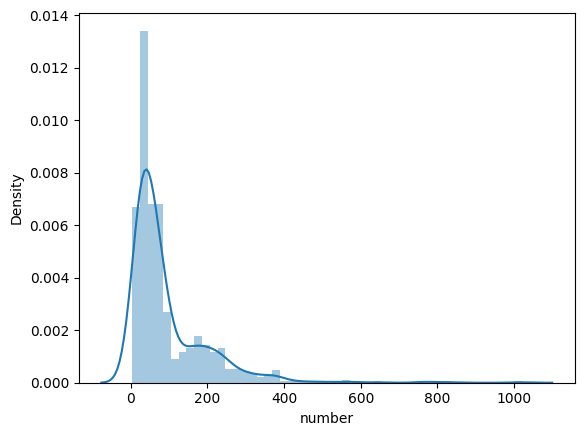

In [133]:
sns.distplot(address_more_1_restaurantes['number'], bins = 50)

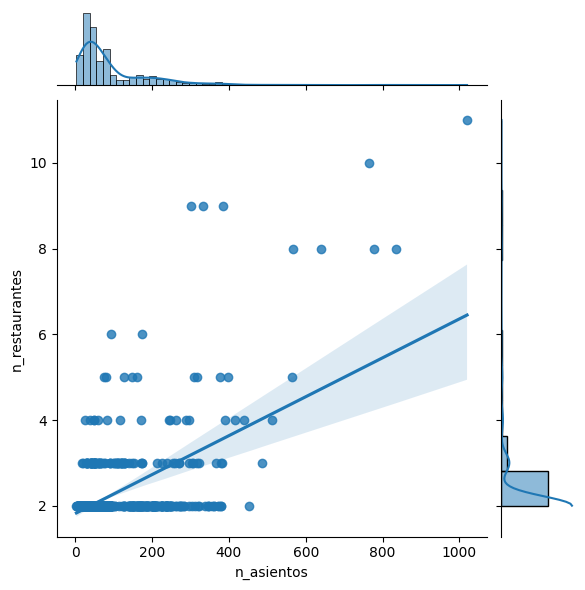

In [144]:
sns.jointplot(x="number", y="object_name", data=address_more_1_restaurantes, kind='reg')
plt.ylabel('n_restaurantes')
plt.xlabel('n_asientos')
plt.show()

Se puede observar que el grafico es sesgado a la derecha, donde las calles con mayor número de asientos son hay menos restaurantes.

# Paso 3. Preparar una presentación

<enlace al almacenamiento en la nube>